In [2]:
# import packages 
import pandas as pd 
import numpy as np 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn import preprocessing
import itertools
import timeit
import matplotlib.pyplot as plt
import import_ipynb

In [3]:
from Kernel_starter import kernelLogRegL2
from Kernel_starter import plotClassifier

importing Jupyter notebook from Kernel_starter.ipynb


### Exercise 1

#### 1.1

$$ E(x) = \int_0^\infty xP(X=x)dx$$
For some positive real numbered $\epsilon > 0$:
$$ E(x) = \int_0^\epsilon xP(X=x)dx + \int_\epsilon^\infty xP(X=x)dx$$

Therefore, when only considering the right term:
$$ E(x) \geq \int_\epsilon^\infty xP(X=x)dx $$

Since $x > \epsilon$ in this region: 
$$\geq \int_\epsilon^\infty \epsilon P(X=x)dx$$ 
$$ = \epsilon \int_\epsilon^\infty P(X=x)dx$$
$$ = \epsilon P(X \geq \epsilon) $$

Therefore:
$$ E(x) \geq \epsilon P(X \geq \epsilon) $$

Rearranging terms arrives at Markov's inequality 
$$ P(X \geq \epsilon) \leq \frac{E(x)}{\epsilon} $$

#### 1.2

$$P(|X - \mu| \geq \epsilon)$$
Squaring both sides is monotonic because both are positive values:
$$ = P((X -\mu)^2 \geq \epsilon ^2) $$
Given $E(x) = \mu$
$$ = P((X - E(X))^2 \geq \epsilon^2) $$


Let $Y = (X - E(X))^2$, by Markov's inequality, which holds since $\epsilon^2$ remains a positive real number:
$$ P(Y \geq \epsilon^2) \leq \frac{E(Y)}{\epsilon^2} $$

Since $E(Y) = E[(X - E(X))^2] = Var(X)$, and given $Var(X) =\sigma^2$,
$$ P(Y \geq \epsilon^2) \leq \frac{\sigma^2}{\epsilon^2} $$

#### 1.3

$$ P(|X - \mu | \geq \epsilon ) $$
Raising both sides to the kth power is montonic because both are positive values:
$$ = P( |X - \mu |^k \geq \epsilon^k ) $$

Let $Y = |X - \mu |^k$, then by Markov's inequality which holds since $\epsilon^k$ remains a positive real number:
$$ P(Y \geq \epsilon^k) \leq \frac{E(Y)}{\epsilon^k} $$

Rewriting it for $Y = |X - \mu |^k$, we arrive at the polynomial version of Markov's inequality:
$$ P(|X - \mu |^k \geq \epsilon^k) \leq \frac{E(|X - \mu |^k)}{\epsilon^k} $$

#### 1.4

$$ P(X-\mu \geq \epsilon) $$
For all positive real numbered, $\epsilon$ and $\lambda$,
$$ = P(e^{\lambda (X-\mu)} \geq e^{\lambda \epsilon}) $$

Let $Y = e^{\lambda (X-\mu)}$, then by Markov's inequality, which holds since $e^{\lambda \epsilon}$ remains a positive real number:
$$ = P(Y \geq e^{\lambda \epsilon}) \leq \frac{E(Y)}{e^{\lambda \epsilon}} $$

Rewriting for $Y = e^{\lambda (X-\mu)}$:
$$ = P(e^{\lambda (X-\mu)} \geq e^{\lambda \epsilon}) \leq \frac{E(e^{\lambda (X-\mu)})}{e^{\lambda \epsilon}} $$

By definition of MGF, $M_x(\lambda) = E(e^{\lambda x})$:
$$ = P(e^{\lambda (X-\mu)} \geq e^{\lambda \epsilon}) \leq \frac{M_{X- \mu}(\lambda)}{e^{\lambda \epsilon}} $$

Substituting in the equality from the first step, we arrive at Chernoff's bound:
$$ P(X - \mu \geq \epsilon) \leq \frac{M_{X- \mu}(\lambda)}{e^{\lambda \epsilon}} $$

#### 1.5

$$ P((\frac{1}{n} \sum_i^n X_i) - \mu \geq \epsilon) $$
Multiplying both sides by $n$:
$$ = P( \sum_i^n X_i - n\mu \geq n\epsilon) $$

Let $Y = \sum_i^n X_i$, given $E(X_i) = \mu$ and since all $X_i$ are iid, $E(Y) = n\mu$
By Chernoff bound,
$$ P(Y - E(Y) \geq n\epsilon)  \leq \frac{E(exp(\lambda(Y - E(Y))}{exp(\lambda n \epsilon)}$$
Subbing back in $Y = \sum_i^n X_i$, 
$$ = \frac{E(exp(\lambda(\sum_i^n X_i - n\mu))}{exp(\lambda n \epsilon)}$$

Because $X_i$ are iid,
$$=\prod_i^n  \frac{E(exp(\lambda( X_i - n\mu))}{exp(\lambda n \epsilon)}$$

By Hoeffding's Lemma:
$$ \leq \frac{\frac{1}{8} \lambda^2 \sum_i^n (b_i - a_i)^2}{exp(\lambda n \epsilon)} $$

Since the bounds are the same for each $x_i$,
$$ = \frac{\frac{1}{8} \lambda^2 n(b - a)^2}{exp(\lambda n \epsilon)} $$

$$ = exp(\frac{1}{8}\lambda^2 n(b-a)^2 - \lambda n \epsilon) $$

The lowest maximum is when the inside term is minimized
$$ min_\lambda \frac{1}{8}\lambda^2 n(b-a)^2 - \lambda n \epsilon$$
Taking the derivative with respect to $\lambda$:
$$ = \frac{1}{4}\lambda n (b-a)^2 - n \epsilon $$

Setting this to 0 and solving for $\lambda$:
$$ \lambda^* = \frac{4\epsilon}{(b-a)^2}$$

Plugging this back into our upper bound:
$$= exp(\frac{1}{8}(\frac{4\epsilon}{(b-a)^2})^2 n (b-a)^2 - (\frac{4\epsilon}{(b-a)^2}) n \epsilon )$$

Simplifying gives us:
$$ P(Y - E(Y) \geq \epsilon) \leq exp(- \frac{2n\epsilon^2}{(b-a)^2})$$

Substituting the equality from first step gives us Hoeffding's inequality:
$$ P((\frac{1}{n} \sum_i^n X_i) - \mu \geq \epsilon)\leq exp(- \frac{2n\epsilon^2}{(b-a)^2})$$

#### 1.6

**(i) Finding lower bound using Hoeffding's**

$$P(|R_s(g) - R(g)| < \epsilon) \geq 1 - \delta $$
$$ = 1 - P(|R_s(g) - R(g)| \geq \epsilon) \geq 1 - \delta $$
$$ = P(|R_s(g) - R(g)| \geq \epsilon) \leq \delta $$

Subbing in definitions of $R_s(g)$ and $R(g)$: 
$$= P(|\frac{1}{n} \sum_i^n l_{01}(y_i, g(x)) - E_D[l_{01}(y_i, g(x))]| \geq \epsilon) \leq \delta $$

Let $X = l_{01}(y_i, g(x))$, then by Hoeffding's two-sided inequality:
$$= P(|\frac{1}{n} \sum_i^n l_{01}(y_i, g(x)) - E_D[l_{01}(y_i, g(x))]| \geq \epsilon) \leq 2exp(\frac{-2n\epsilon^2}{(b-a)^2})$$

Since X (ie the loss function) has bounds between 0 and 1,
$$ \leq 2exp(-2n\epsilon^2) $$

This is the upper bound on probability given $n$ and $\epsilon$, which we want to be $\leq \delta$. Therefore:
$$ 2exp(-2n\epsilon^2) \leq \delta $$
$$ -2n\epsilon^2 \leq ln(\frac{\delta}{2}) $$
Solving for n gives us the lower bound using Hoeffding's:
$$ n \geq -\frac{1}{2\epsilon^2}ln(\frac{\delta}{2}) $$

**(ii) Finding lower bound using Chebyschev's**

Using the same logic and steps from the first part: 
$$P(|R_s(g) - R(g)| < \epsilon) \geq 1 - \delta $$
$$ = P(|R_s(g) - R(g)| \geq \epsilon) \leq \delta $$
$$= P(|\frac{1}{n} \sum_i^n l_{01}(y_i, g(x)) - E_D[l_{01}(y_i, g(x))]| \geq \epsilon) \leq \delta $$

Let $X = l_{01}(y_i, g(x))$:
$$= P(|\frac{1}{n} \sum_i^n x_i - E[x_i]| \geq \epsilon) \leq \delta $$

Multiplying LHS terms by n and squaring :
$$= P((\sum_i^n x_i - nE[x_i])^2 \geq n^2\epsilon^2)$$

Let $Y = \sum_i^n x_i$ and since $x_i$ are iid:
$$ P((Y- E(Y))^2 \geq \epsilon^2 n^2) $$

Since $\epsilon^2 n^2$ is a positive real-valued number, by Chebyschev's inequality:
$$ P((Y- E(Y))^2 \geq \epsilon^2 n^2) \leq \frac{Var(Y)}{\epsilon^2 n^2}$$

Given $Var(X_i) = 1$ and $X_is$ are iid,  $Var(Y) = Var(\sum_i^n X_i) = n$,
$$ P((Y- E(Y))^2 \geq \epsilon^2 n^2) \leq \frac{1}{\epsilon^2 n}$$

This is the upper bound on probability given $n$ and $\epsilon$, which we want to be $\leq \delta$. Therefore:
$$ \frac{1}{\epsilon^2 n} \leq \delta $$

Solving for $n$ gives the lower bound using Chebyschev's inequality: 
$$ n \geq \frac{1}{\epsilon^2 \delta} $$

**(iii)** For the same $\epsilon$ and $\delta$, the Hoeffding's lower bound on n requires a smaller n to achieve the same upper bound in probability since 
$$-\frac{1}{2\epsilon^2}ln(\frac{\delta}{2}) < \frac{1}{\epsilon^2 \delta}$$

#### 1.7

Since the loss for a single point between two binary classifiers from the same algorithm is bounded (ie max difference is 1), then the difference in risk for the classifiers across all $n$ points is also bounded. Therefore, they satisfy the bounded difference property. 

By bounded difference property:
$$ = sup _{x} |f(x_1, ..., x_k, ..., x_n) - f(x_1, ..., x_k', ..., x_n) | \leq c_k $$

Let $f =  R_s(g_s)$ for the classifier trained on $x_1, .., x_n$ and $ f = R_{s^k}(g_{s^k})$ for that trained with the swapped point $x_k'$:
$$ = sup _{x} |R_s(g_s) - R_{s^k}(g_{s^k}) | \leq c_k $$

By definition $R_s(g_s) = \frac{1}{n}\sum_i^nl_{01}(g_s(x_i), y_i) $ and $R_{s^k}(g_{s^k}) = \frac{1}{n}\sum_i^nl_{01}(g_{s^k}(x_i), y_i) $:
$$ = |\frac{1}{n}\sum_i^nl_{01}(g_s(x_i), y_i) - \frac{1}{n}\sum_i^nl_{01}(g_{s^k}(x_i), y_i)|$$

Breaking up into points where the $x_i$ are equal across classifiers and the one point they differ:
$$ = |\frac{1}{n}[\sum_{i, i\neq k}^{n-1}l_{01}(g_s(x_i), y_i) - l_{01}(g_{s^k}(x_i), y_i)] + \frac{1}{n}(l_{01}(g_s(x_k), y_k) - l_{01}(g_{s^k}(x_k'), y_k))|$$

For the first term - since we know that the classifiers come from a $\beta$ stable algorithm:
$$ sup_{x, y} |l_{01}(g_s(x_i), y_i) - l_{01}(g_{s^k}(x_i), y_i)]| \leq \beta $$
Because points are iid:
$$ = \frac{1}{n}[\sum_{i, i\neq k}^{n-1} sup_{x, y} |l_{01}(g_s(x_i), y_i) - l_{01}(g_{s^k}(x_i), y_i)]| \leq \frac{n-1}{n} \beta$$

Based on post on ed discussion, the bound is relaxed to just $\beta$

For the second term, the maximum loss that one point can incur between the two classifiers is 1:
$$sup |\frac{1}{n}(l_{01}(g_s(x_k), y_k) - l_{01}(g_{s^k}(x_k'), y_k))| \leq \frac{1}{n}$$

Therefore: 
$$ = sup _{x} |R_s(g_s) - R_{s^k}(g_{s^k}) | \leq c_k = \beta + \frac{1}{n} $$

Then by McDiarmid's inequality: 
$$ P(|R_s(g_s) - E(R_s(g_s))| \geq \epsilon) \leq 2 exp(\frac{-2\epsilon^2}{\sum_i^n c_i^2})$$

Given we calculated $c_i \leq \beta + \frac{1}{n}$: and $c_i$ is the same across all $n$ iid points: 
$$ P(|R_s(g_s) - E(R_s(g_s))| \geq \epsilon) \leq 2 exp(\frac{-2\epsilon^2}{n(\beta + \frac{1}{n})^2})$$

### Exercise 2

#### 2.1

The VC dimension is 1. 

At $n=1$, no matter where the point is and what label, we can place the threshold $t$ above and below to satisfy the condition $1_{x < t}$. But for $n=2$, the points fail if they are on the same horizontal line. Then, if the point that is relatively higher is of class 1 and the other is class 0, then the function cannot perfectly classify because a $t$ that can classify the point of class 1 correctly will also classify the point of class 0 as 1. 

#### 2.2

The VC dimension is 2. 

For $n=1$, it performs the same as the previous part, we can specify $t_1$ and $t_2$ to either bound either side or otherwise depending on if it is class 1 or 0, respectively. For $n=2$, it can still perfectly classify because the additional lower bound lets us now distinguish when the class 1 point is higher than class 0 point, unlike in the previous problem. But for $n=3$, the function will fail if the inner point is of class 0 and the two points on either extreme are of class 1. 

#### 2.3

The VC dimension is d. 

At dimension $d$, there are $d$ unique unit vectors from the origin so for $n = 1,...,d$, no matter the labeling, there is a hyperplane that can perfectly distinguish the points. For $ n= d+1$, one of the unit vectors has to share a dimension with another unit vector. For at least one of the potential label combinations, they will have to have opposite class labels and the hyperplane cannot perfectly separate the points in those instances. 

#### 2.4

No solution necessary via Ed discussion

#### 2.5

If the $VC(F) = d$, this means that there are $2^d$ ways to configure the points, and so there needs to be at least $2^d$ functions for the classifier so that in the worst case scenario where each configuration is shattered by one of the functions in the class. 

Therefore: 
$$ |F| \geq 2^d $$
$$ log_2|F| \geq d $$
We see that the VC dimension $d \leq log_2|F|$

### Exercise 3

#### 3.1

The optimal predictive function is $f^* = \sum_i^n \alpha_i k(z, x_i)$ where the kernel is a linear classifer $k(z, x_i) = \langle z, x_i\rangle$

This is because we are given that $\langle f_\theta, f_\theta \rangle = \theta^T \theta$. 


By the property of RKHS where $\langle K_\theta, K_\theta \rangle = K(x, x)$, we can see that for these two forms to match, the kernel needs to follow the form of a linear classifier. 

#### 3.2

The dual problem is:
$$ \max\limits_{\alpha_i \geq 0} [\min\limits_{\omega, \zeta_i} L(\omega, \zeta, \alpha)]$$ 

Given the primal problem and the constraint, the Lagrangian is:
$$ L(\omega, \zeta, \alpha) = \frac{1}{2} ||\omega||^2 + C\sum_i^n ln(1 + exp(-\zeta_i)) + \sum_i^n \alpha_i (\zeta_i - y_i (\omega^Tx_i)) $$

Minimizing $L(\omega, \zeta, \alpha)$ with respect to $\omega$ and $\zeta_i$:
$$\frac{\partial L}{\partial\omega} = \omega - \sum_i^n \alpha_i y_i x_i$$
$$\frac{\partial L}{\partial\zeta_i} = \frac{-C exp(-\zeta_i)}{1 + exp(-\zeta_i)} + \alpha_i $$

Setting each partial derivative to 0 and solving for each parameter: 
$$\omega^* = \sum_i^n \alpha_i y_i x_i $$
For $\zeta_i^*$:
$$ \frac{exp(-\zeta_i)}{(1+exp(-\zeta_i)} = \frac{\alpha_i}{C} $$

$$ \frac{1}{(exp(\zeta_i) +1} = \frac{\alpha_i}{C} $$
$$ \zeta_i^* = ln(\frac{C}{\alpha_i} -1 ) $$

We arrive at the dual problem when we substitute these minimized parameters into the primal problem and maximize over $\alpha_i$:
$$\max\limits_{\alpha_i \geq 0} \frac{1}{2} \sum_i^n \alpha_i\alpha_i y_i y_i x_i x_i + C \sum_i^n ln( 1+ exp(-ln(\frac{C}{\alpha_i} - 1)))$$

Simplifying the second term:
$$ C \sum_i^n ln( 1+ exp(-ln(\frac{C}{\alpha_i} - 1)))$$ 
$$ = C \sum_i^n ln( 1+ exp(ln(\frac{\alpha_i}{C - \alpha_i})))$$ 
$$ = C \sum_i^n ln( 1+ \frac{\alpha_i}{C - \alpha_i})$$ 
$$ = C \sum_i^n ln(C) - ln(C - \alpha_i)$$ 

Our simplified dual problem is: 
$$\max\limits_{\alpha_i \geq 0} \frac{1}{2} \sum_i^n \alpha_i\alpha_i y_i y_i x_i x_i + C \sum_i^n ln(C) - ln(C - \alpha_i)$$ 

### Exercise 4

In [17]:
# read in data 
non_lin_df = pd.read_csv('nonlineardata.csv', header=None, names=['x1', 'x2', 'y'])

non_lin_x = non_lin_df.iloc[:, 0:2]
non_lin_y = non_lin_df.iloc[:,2]

In [18]:
# split data into train test split 
non_lin_X_train, non_lin_X_test, non_lin_y_train, non_lin_y_test = train_test_split(non_lin_x, non_lin_y, 
                                                    test_size=0.2, 
                                                    random_state=2022)

In [19]:
non_lin_X_train2 = np.array(non_lin_X_train)
non_lin_y_train2 = np.array(non_lin_y_train)
non_lin_X_test2 = np.array(non_lin_X_test)
non_lin_y_test2 = np.array(non_lin_y_test)

#### 4.1

In [20]:
svc1 = SVC(C=100, kernel='linear')
svc1.fit(non_lin_X_train2,non_lin_y_train2)

SVC(C=100, kernel='linear')

In [21]:
# training, testing rate
train_preds = svc1.predict(non_lin_X_train2)
test_preds = svc1.predict(non_lin_X_test2)
print('training error: ' + str(np.mean(train_preds != non_lin_y_train2)))
print('testing error: ' + str(np.mean(test_preds != non_lin_y_test2)))

training error: 0.1875
testing error: 0.2375


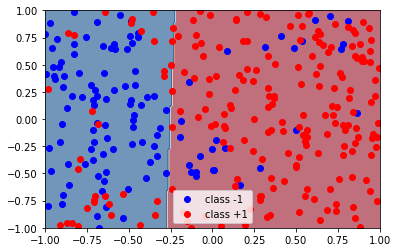

In [22]:
plotClassifier(svc1, non_lin_X_train2,non_lin_y_train2)

#### 4.2

In [23]:
svc2 = SVC(C=100, kernel='poly', degree=2)
svc2.fit(non_lin_X_train2,non_lin_y_train2)

SVC(C=100, degree=2, kernel='poly')

In [24]:
# training, testing rate
train_preds = svc2.predict(non_lin_X_train2)
test_preds = svc2.predict(non_lin_X_test2)
print('training error: ' + str(np.mean(train_preds != non_lin_y_train2)))
print('testing error: ' + str(np.mean(test_preds != non_lin_y_test2)))

training error: 0.365625
testing error: 0.4125


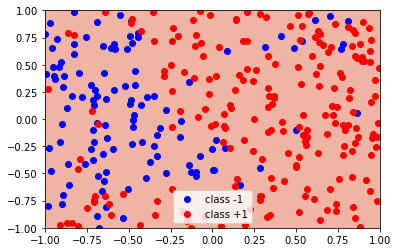

In [25]:
plotClassifier(svc2, non_lin_X_train2,non_lin_y_train2)

#### 4.3

In [26]:
svc3 = SVC(C=100, kernel='rbf', gamma = 4)
svc3.fit(non_lin_X_train2,non_lin_y_train2)

SVC(C=100, gamma=4)

In [27]:
# training, testing rate
train_preds = svc3.predict(non_lin_X_train2)
test_preds = svc3.predict(non_lin_X_test2)
print('training error: ' + str(np.mean(train_preds != non_lin_y_train2)))
print('testing error: ' + str(np.mean(test_preds != non_lin_y_test2)))

training error: 0.1
testing error: 0.15


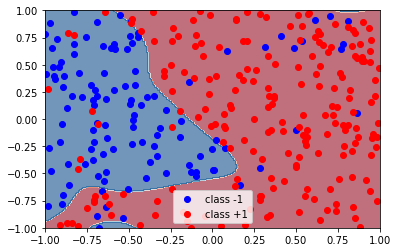

In [28]:
plotClassifier(svc3, non_lin_X_train2,non_lin_y_train2)

#### 4.4

In [29]:
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [30]:
training_errors = []
test_errors = []

for gamma in gammas:
    svc_g = SVC(C=100, kernel='rbf', gamma = gamma)
    svc_g.fit(non_lin_X_train2,non_lin_y_train2)
    
    train_preds = svc_g.predict(non_lin_X_train2)
    test_preds = svc_g.predict(non_lin_X_test2)
    training_errors.append(np.mean(train_preds != non_lin_y_train2))
    test_errors.append(np.mean(test_preds != non_lin_y_test2))
    

Text(0.5, 0, 'log gamma')

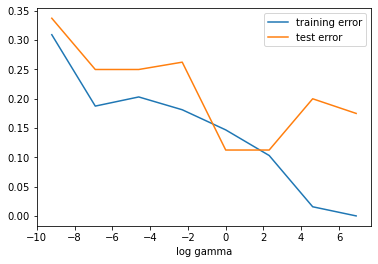

In [59]:
plt.plot(np.log(gammas), training_errors)
plt.plot(np.log(gammas), test_errors)

plt.legend(['training error', 'test error'])
plt.xlabel('log gamma')

As $\gamma$ increases, the training error decreases towards 0, while the testing error first decreases and starts to increase rapidly (around $\gamma = 100$). This is because as $\gamma$ increases, the model begins to overfit the training data, which in thus decreases the generalizability and therefore the performance on the test data. A small $\gamma$ corresponds to high bias since at high values of $\gamma$ the model classifies the training data almost perfectly, ie low bias. 

#### 4.5

In [32]:
log_lin = kernelLogRegL2()
log_lin.lammy = 0.01
log_lin.fit(X = non_lin_X_train2,y = non_lin_y_train2)

<string>:2: RuntimeWarning: overflow encountered in exp
<string>:20: RuntimeWarning: overflow encountered in exp


In [33]:
# training, testing rate
train_preds = log_lin.predict(non_lin_X_train2)
test_preds = log_lin.predict(non_lin_X_test2)
print('training error: ' + str(np.mean(train_preds != non_lin_y_train2)))
print('testing error: ' + str(np.mean(test_preds != non_lin_y_test2)))

training error: 0.2375
testing error: 0.2375


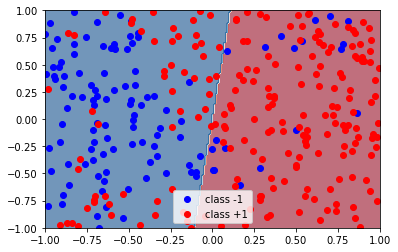

In [34]:
plotClassifier(log_lin, non_lin_X_train2,non_lin_y_train2)

#### 4.6

In [35]:
def kernel_poly(X1, X2, p=2):
    return (1 + np.matrix.dot(X1, X2.T))**p

In [36]:
log_poly = kernelLogRegL2()
log_poly.lammy = 0.01
log_poly.kernel_fun = kernel_poly
log_poly.fit(X = non_lin_X_train2,y = non_lin_y_train2)

In [37]:
# training, testing rate
train_preds = log_poly.predict(non_lin_X_train2)
test_preds = log_poly.predict(non_lin_X_test2)
print('training error: ' + str(np.mean(train_preds != non_lin_y_train2)))
print('testing error: ' + str(np.mean(test_preds != non_lin_y_test2)))

training error: 0.184375
testing error: 0.2375


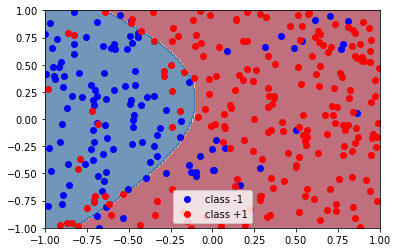

In [38]:
plotClassifier(log_poly, non_lin_X_train2,non_lin_y_train2)

#### 4.7

In [39]:
def kernel_rbf(X1, X2, sigma=0.5):
    X1_norm = np.linalg.norm(X1, axis=1) ** 2
    X2_norm = np.linalg.norm(X2, axis=1) ** 2
    
    norm = X1_norm.reshape(-1, 1) + X2_norm.reshape(1, -1) - 2 * np.matrix.dot(X1, X2.T)

    return np.exp(- norm / sigma**2)

In [40]:
t = np.linalg.norm(non_lin_X_train2, axis=1) ** 2

In [41]:
log_rbf = kernelLogRegL2()
log_rbf.lammy = 0.01
log_rbf.kernel_fun = kernel_rbf
log_rbf.fit(X = non_lin_X_train2,y = non_lin_y_train2)

In [42]:
# training, testing rate
train_preds = log_rbf.predict(non_lin_X_train2)
test_preds = log_rbf.predict(non_lin_X_test2)
print('training error: ' + str(np.mean(train_preds != non_lin_y_train2)))
print('testing error: ' + str(np.mean(test_preds != non_lin_y_test2)))

training error: 0.1125
testing error: 0.15


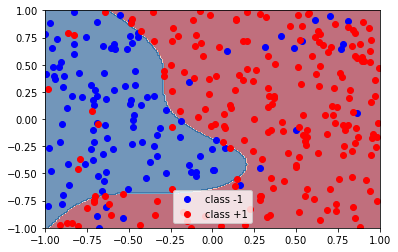

In [43]:
plotClassifier(log_rbf, non_lin_X_train2,non_lin_y_train2)

#### 4.8

In [44]:
training_errors = []
test_errors = []

for gamma in gammas:
    log_rbf = kernelLogRegL2(**{'sigma':np.sqrt(1/gamma)})
    log_rbf.lammy = 0.01
    log_rbf.kernel_fun = kernel_rbf
    log_rbf.fit(X = non_lin_X_train2,y = non_lin_y_train2)
    
    train_preds = log_rbf.predict(non_lin_X_train2)
    test_preds = log_rbf.predict(non_lin_X_test2)
    training_errors.append(np.mean(train_preds != non_lin_y_train2))
    test_errors.append(np.mean(test_preds != non_lin_y_test2))
    

Text(0.5, 0, 'log gamma')

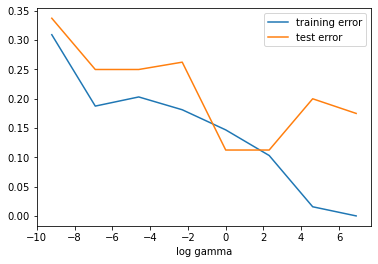

In [60]:
plt.plot(np.log(gammas), training_errors)
plt.plot(np.log(gammas), test_errors)

plt.legend(['training error', 'test error'])
plt.xlabel('log gamma')

### Exercise 5

In [4]:
# read data 
spectf = pd.read_csv('spectf.csv', header=None)

# split data into train test split 
sp_X_train, sp_X_test, sp_y_train, sp_y_test = train_test_split(spectf.iloc[:,1:], spectf.iloc[:,0], 
                                                    test_size=0.25, 
                                                    random_state=2022)

In [5]:
scaler = preprocessing.StandardScaler().fit(sp_X_train)
sp_X_train_scaled = scaler.transform(sp_X_train)
scaler_test = preprocessing.StandardScaler().fit(sp_X_test)
sp_X_test_scaled = scaler.transform(sp_X_test)

#### 5.1

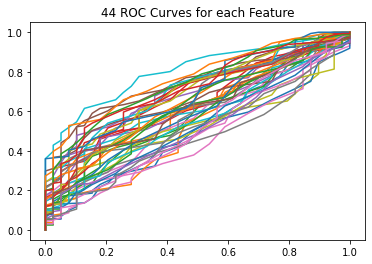

In [7]:
aucs = []
for i in range(sp_X_train_scaled.shape[1]):
    X_train = sp_X_train_scaled[:, i].reshape(200, -1)
    lr = LogisticRegression()
    lr.fit(X_train, sp_y_train)
    y_pred_proba = lr.predict_proba(X_train)[::,1]
    fpr, tpr, _ = roc_curve(sp_y_train,  y_pred_proba)
    
    aucs.append(auc(fpr,tpr))
    
    plt.plot(fpr, tpr)
    plt.title('44 ROC Curves for each Feature')

#### 5.2

My method for finding 300 subsets starts by taking the training set AUC scores from training on each individual feature from part 1. This gives me a benchmark on how useful each feature is to predicting the data. I use these scores to subset the features to only include the top 25% based on their training AUC performance, which leaves us with 11 possible features. For each of these 11 features, I do not consider any features that have more than 0.5 correlation with the given feature. I then find all combinations with that given feature and for the remainder of the 10 features after filtering based on correlation. These combinations are for all sets of two and three features. This resulted in 324 subsets, and I only use the first 300 subsets to use for my further analysis. 

In [8]:
subsets = [] 

In [9]:
corr_df = sp_X_train.corr()
aucs = pd.DataFrame(aucs)
inds = np.where(aucs[0] > aucs[0].quantile(0.75))[0]

In [10]:
for i in inds: 
    # get its corr column for feature i 
    c = corr_df.iloc[i, inds]
    
    # not highly correlated 
    inds_filt = c.index[c< 0.5] - 1
    
    # make every combination between inds_filt and i 
    subset_i = list(itertools.product([i], inds_filt))
    subset_j = list(itertools.product([i], inds_filt, inds_filt))
    
    subsets = subsets + subset_i
    subsets = subsets + subset_j

#### 5.3

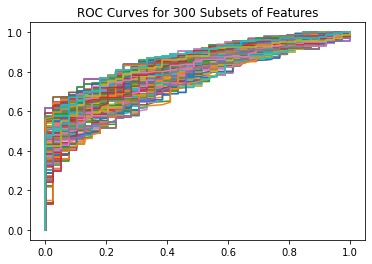

In [11]:
auc_subsets = []

for feat in subsets[:300]:
    X_train = sp_X_train_scaled[:, feat].reshape(200, -1)
    lr = LogisticRegression()
    lr.fit(X_train, sp_y_train)
    y_pred_proba = lr.predict_proba(X_train)[::,1]
    fpr, tpr, _ = roc_curve(sp_y_train,  y_pred_proba)
    
    auc_subsets.append(auc(fpr,tpr))
    plt.plot(fpr, tpr)
    plt.title('ROC Curves for 300 Subsets of Features')

In [12]:
max_ind = np.where(auc_subsets == np.max(auc_subsets))[0][0]
best_feat = subsets[max_ind]

In [13]:
print('Best training AUC score is: ' + str(round(np.max(auc_subsets),3)) + ' for features: ' + str(best_feat))

Best training AUC score is: 0.861 for features: (39, 5, 25)


#### 5.4

Text(0.5, 1.0, 'ROC Curves for Best Performing Sparse LR')

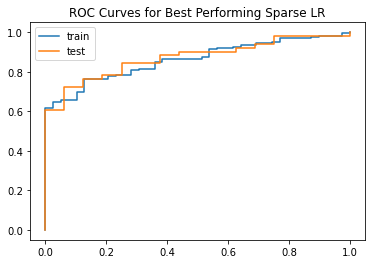

In [14]:
X_train = sp_X_train_scaled[:, best_feat].reshape(200, -1)
X_test = sp_X_test_scaled[:, best_feat].reshape(67, -1)
lr = LogisticRegression()
lr.fit(X_train, sp_y_train)
y_pred_proba = lr.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(sp_y_train,  y_pred_proba)
plt.plot(fpr, tpr, label = 'train')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(sp_y_test,  y_pred_proba)
plt.plot(fpr, tpr, label = 'test')
plt.legend()
plt.title('ROC Curves for Best Performing Sparse LR')

In [15]:
preds = lr.predict(X_test)
print('Test error for sparse logistic regression: ' + str(round(np.mean(preds != sp_y_test),3)))

Test error for sparse logistic regression: 0.194


In [16]:
l2_lr = LogisticRegression(penalty='l2')
l2_lr.fit(sp_X_train_scaled, sp_y_train)
preds = l2_lr.predict(sp_X_test_scaled)

# test error for l2 log reg
print('Test error for l2-regularized logistic regression: ' + str(round(np.mean(preds != sp_y_test),3)))

Test error for l2-regularized logistic regression: 0.224


Yes, this technique does do better. The best performing sparse logistic regression uses 3 features, generalizes well, and has a test error of about 19%. Using all 44 features, L2-regularized logistic regression has a slightly worse test error of 22%. 

### Exercise 6

#### 6.1

In [46]:
# sampling 
X1 = np.random.normal(1, 20, (100, 5000000))
y = np.random.normal(1, 0.5, 100)

In [85]:
# ridge
ridge_timer = timeit.Timer(lambda: Ridge().fit(
    X1, y)) 
ridge_timer.timeit(1)

64.5399674299988

In [84]:
# kernel ridge
k_ridge_timer = timeit.Timer(lambda: KernelRidge().fit(
    X1, y)) 
k_ridge_timer.timeit(1)

4.745660376007436

The kernel ridge is much faster - approximately 5 seconds vs 65 seconds for ridge regression. 

For $X$ with shape $nxp$, because of the matrix inversion in both closed-form solutions, the computational complexity of ridge is $O(p^3)$ and for kernel ridge is $O(n^3)$. Since $n = 100$ and $p = 50000000$ in this part, we can clearly see that ridge will take longer because $ p >> n$. 

#### 6.2

In [70]:
X2 = np.random.normal(1, 20, (1000, 500))
y = np.random.normal(1, 0.1, 1000)

In [71]:
# try with alpha = 1 
ridge = Ridge(alpha=1).fit(X2, y)
lasso = Lasso(alpha=1).fit(X2, y) 

In [72]:
# try with alpha = 0.5 
ridge = Ridge(alpha=0.5).fit(X2, y)
lasso = Lasso(alpha=0.5).fit(X2, y) 

In [73]:
# ridge.coef_
# lasso.coef_

I looked at the coefficients for each of the models (code commented out above to keep output shorter). At higher levels of alpha or stronger regularization, lasso will set some coefficients to zero while ridge will shrink coefficients but not set to exactly zero. Therefore, lasso would be beneficial for feature selection / dimension reduction as it would actually set coefficients of some features to zero. 

#### 6.3

In [74]:
alphas = np.linspace(0.01,0.1, 25)

In [75]:
lasso_res = np.zeros((500,25))
ridge_res = np.zeros((500,25))

In [76]:
for i in range(len(alphas)):
    ridge = Ridge(alpha=alphas[i]).fit(X2, y)
    lasso = Lasso(alpha=alphas[i]).fit(X2, y) 
    
    lasso_res[:,i] = lasso.coef_
    ridge_res[:,i] = ridge.coef_

In [77]:
# for each row 
lasso_res_flip = np.flip(lasso_res, axis=1)
ridge_res_flip = np.flip(ridge_res, axis=1)

alphas_flip = np.flip(1/ alphas, axis=0)

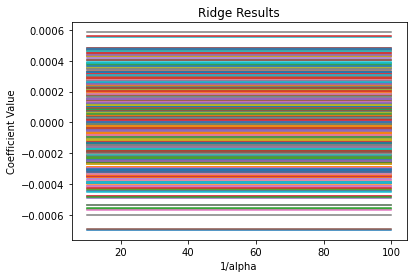

In [78]:
for row in ridge_res_flip:
    plt.plot(alphas_flip, row)
    plt.title('Ridge Results')
    plt.xlabel('1/alpha')
    plt.ylabel('Coefficient Value')

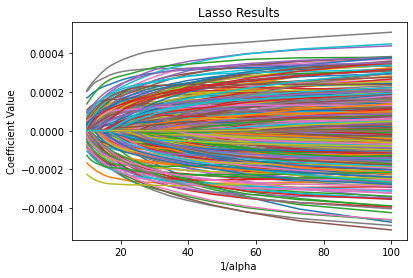

In [79]:
for row in lasso_res_flip:
    plt.plot(alphas_flip, row)
    plt.title('Lasso Results')
    plt.xlabel('1/alpha')
    plt.ylabel('Coefficient Value')

At higher $\alpha$ levels, ie smaller $1/\alpha$ levels, we see that Lasso does shrink coefficients to zero while Ridge is asymptotically to 0, but never equal